<a href="https://colab.research.google.com/github/fagonzalezo/sklearn-kdcrf/blob/master/examples/KDCRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup code

In [3]:
# Install kdrcf if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !git clone https://github.com/fagonzalezo/sklearn-kdcrf.git
    !mv sklearn-kdcrf/kdcrf .
    

In [4]:
%matplotlib inline
import pylab as pl

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    print(X.shape)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict_proba(x)[0][1]
    return pred_fun

## Two moons classification

In [5]:
import warnings
import numpy as np
from kdcrf import KDClassifierRF
from kdcrf import RBFSamplerORF

import time


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)



(1000, 2)
Score: 0.9515151515151515
--- 4.585708141326904 seconds ---


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


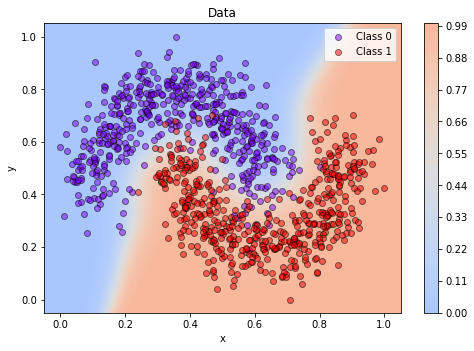

In [7]:
start_time = time.time()
clf = KDClassifierRF(approx='exact', gamma=100)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

(1000, 2)
Score: 0.9454545454545454
--- 5.995198488235474 seconds ---


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


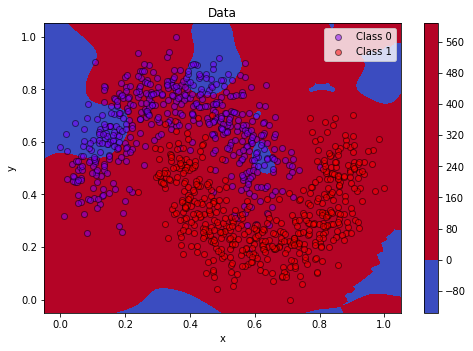

In [23]:
start_time = time.time()
clf = KDClassifierRF(approx='rff', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))


(1000, 2)
Score: 0.9484848484848485


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


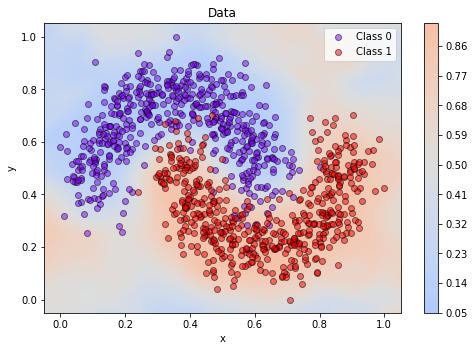

In [22]:
clf = KDClassifierRF(approx='rff+', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))

(1000, 2)
Score: 0.958
--- 1.7474756240844727 seconds ---


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


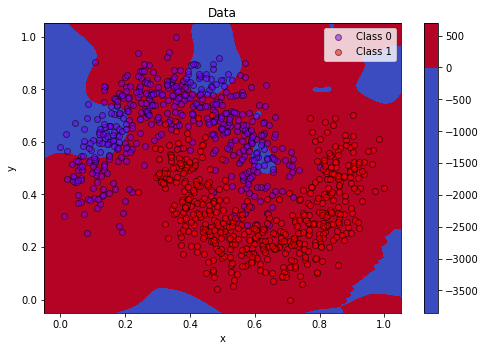

In [21]:
start_time = time.time()
clf = KDClassifierRF(approx='lrff', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X, y))
print("--- %s seconds ---" % (time.time() - start_time))


In [10]:
pred = clf.predict_proba(X_test)
pred[:10]

array([[ 0.95801402,  0.04198598],
       [ 0.99185402,  0.00814598],
       [ 0.00960567,  0.99039433],
       [ 0.98517924,  0.01482076],
       [ 0.95774552,  0.04225448],
       [ 1.00594808, -0.00594808],
       [ 0.9574372 ,  0.0425628 ],
       [ 0.95924615,  0.04075385],
       [ 0.02592392,  0.97407608],
       [ 0.95176592,  0.04823408]])

(1000, 2)
Score: 0.9454545454545454
--- 1.8642761707305908 seconds ---


C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:184: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyect

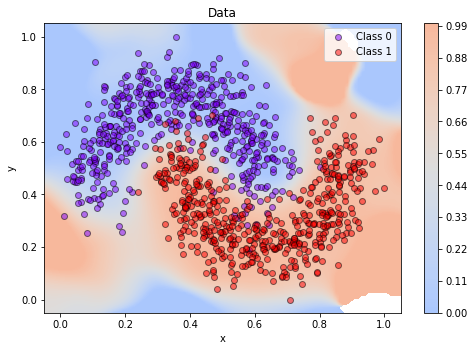

In [20]:
start_time = time.time()
clf = KDClassifierRF(approx='lrff+', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))


(1000, 2)
Score: 0.9424242424242424
--- 3.898604154586792 seconds ---


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


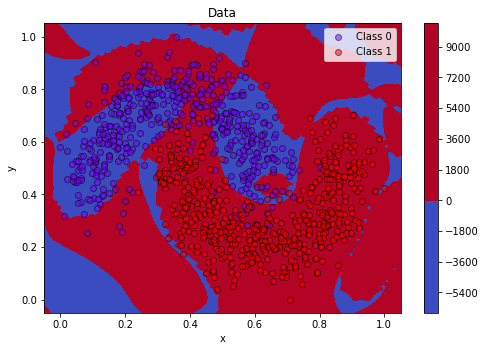

In [8]:

start_time = time.time()
sampler = RBFSamplerORF(gamma=100, random_state=17, n_components=1000)
clf = KDClassifierRF(approx='rff', gamma=100, random_state=17, n_components=1000, sampler=sampler)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:

start_time = time.time()
sampler = RBFSamplerORF(gamma=100, random_state=17, n_components=1000)
clf = KDClassifierRF(approx='rff+', gamma=100, random_state=17, n_components=1000, sampler=sampler)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:

start_time = time.time()
sampler = RBFSamplerORF(gamma=100, random_state=17, n_components=1000)
clf = KDClassifierRF(approx='lrff', gamma=100, random_state=17, n_components=1000, sampler=sampler)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

(1000, 2)
Score: 0.9454545454545454
--- 2.315845012664795 seconds ---


C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:185: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
C:\Proyect

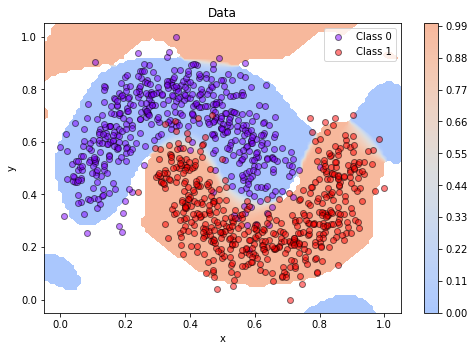

In [10]:

start_time = time.time()
sampler = RBFSamplerORF(gamma=100, random_state=17, n_components=1000)
clf = KDClassifierRF(approx='lrff+', gamma=100, random_state=17, n_components=1000, sampler=sampler)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

## Digits classification

In [6]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA

# The digits dataset
digits = datasets.load_digits(n_class=9)

n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (data[:n_samples // 2],
                             digits.target[:n_samples // 2])


# Now predict the value of the digit on the second half:
data_test, targets_test = (data[n_samples // 2:],
                           digits.target[n_samples // 2:])



In [8]:
gammas = [2**i for i in range(-7,4)]

scores = {}
classifiers = {'svm':svm.SVC(), 'kdc exact':KDClassifierRF(approx='exact')}
for ncomp in [100, 500, 1000, 2000]:
    classifiers['kdc rff ' + str(ncomp)] = KDClassifierRF(approx='rff', 
                                                          n_components=ncomp,
                                                          random_state=1)
for ncomp in [100, 500, 1000, 2000]:
    classifiers['kdc lrff ' + str(ncomp)] = KDClassifierRF(approx='lrff', 
                                                          n_components=ncomp,
                                                          random_state=1)   


for ncomp in [100, 500, 1000]:
    sampler = RBFSamplerORF(random_state=17, n_components=ncomp)
    classifiers['kdc rff orf ' + str(ncomp)] = KDClassifierRF(approx='rff', 
                                                          n_components=ncomp,
                                                          random_state=1,
                                                          sampler=sampler)    


for ncomp in [100, 500, 1000]:
    sampler = RBFSamplerORF(random_state=17, n_components=ncomp)
    classifiers['kdc lrff orf ' + str(ncomp)] = KDClassifierRF(approx='lrff', 
                                                          n_components=ncomp,
                                                          random_state=1,
                                                          sampler=sampler)    

    
for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, clf in classifiers.items():
        clf.set_params(gamma=gamma)
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))


0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as 

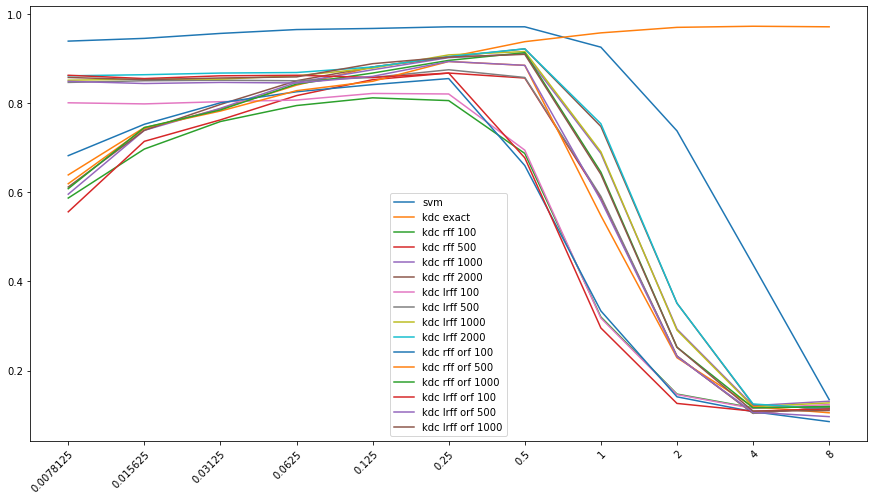

In [9]:
pl.rcParams["figure.figsize"] = (15,8)
for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()

In [ ]:
gammas = [2**i for i in range(-7,4)]

scores = {}
classifiers = {'svm':svm.SVC(), 
               'kdc exact':KDClassifierRF(approx='exact'),
               'rff 500':KDClassifierRF(approx='rff', n_components=500,
                                        random_state=1),
               'rff 2000':KDClassifierRF(approx='rff', n_components=2000,
                                        random_state=1),
               'rff+ 500':KDClassifierRF(approx='rff+', n_components=500,
                                        random_state=1),
               'rff+ 2000':KDClassifierRF(approx='lrff+', n_components=2000,
                                        random_state=1),
               'lrff 500':KDClassifierRF(approx='lrff', n_components=500,
                                        random_state=1),
               'lrff 2000':KDClassifierRF(approx='lrff', n_components=2000,
                                        random_state=1),
               'lrff+ 500':KDClassifierRF(approx='lrff+', n_components=500,
                                        random_state=1),
               'lrff+ 2000':KDClassifierRF(approx='lrff+', n_components=2000,
                                        random_state=1)}

for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, clf in classifiers.items():
        clf.set_params(gamma=gamma)
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))

In [ ]:
for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()

In [7]:
gammas = [2**i for i in range(-7,4)]

scores = {}
feature_map_fourier = RBFSampler(n_components=2000, random_state=1)
rff_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                    ("svm", svm.LinearSVC())])

feature_map_fourier = RBFSamplerORF(n_components=2000, random_state=1)
orf_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                    ("svm", svm.LinearSVC())])

classifiers = {'svm':('gamma', svm.SVC()), 
               'kdc exact':('gamma', KDClassifierRF(approx='exact')),
               'rff+ 2000':('gamma', KDClassifierRF(approx='rff+', 
                                                    n_components=2000,
                                                    random_state=1)),
               'lrff+ 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                    n_components=2000,
                                                    random_state=1)),            
               'rff+ orf 2000':('gamma', KDClassifierRF(approx='rff+', 
                                                    n_components=2000,
                                                    random_state=1, 
                                                    sampler=RBFSamplerORF(n_components=2000, random_state=1))),
               'lrff+ orf 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                    n_components=2000,
                                                    random_state=1, 
                                                    sampler=RBFSamplerORF(n_components=2000, random_state=1))),
               'svm rff 2000':('feature_map__gamma', rff_svm),
               'svm orf 2000':('feature_map__gamma', orf_svm)}

for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, (gname, clf) in classifiers.items():
        clf.set_params(**{gname:gamma})
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

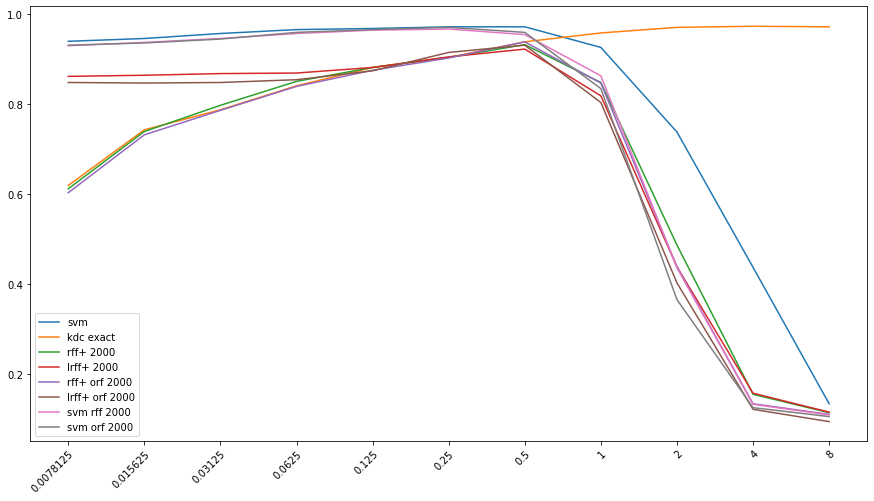

In [8]:
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()